# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [14]:
from matplotlib import pyplot as plt
from matplotlib import cm

import pandas as pd
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd

In [72]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

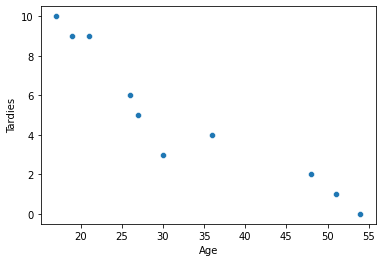

In [3]:
sns.scatterplot(data=student_data, x="Age", y="Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Yes, it seems that these variables have a strong and negative correlation. The hypotheses we can study is if younger people arrives later than older ones.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [5]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Covariance indicates the direction of the linear relationship between variables while correlation measures both the strength and direction of the linear relationship between two variables.
In this case, both values say that the linear relationship is negative.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [73]:
lr = LinearRegression()

In [74]:
lr.fit(

    X = student_data[["Age"]],
    y = student_data.Tardies
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [75]:
beta_1

-0.2428207709159808

In [76]:
beta_0

12.888803363135768

In [77]:
student_data["Age_predict"] = student_data.Age.mean()

In [ ]:
TSS = ((student_data.Age - student_data.mean_predict) **2 ).sum()
TSS

In this linear regression, our outcome will be the sum of beta_1 (multiply by the age) plus the intercept, which is beta_0.

Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

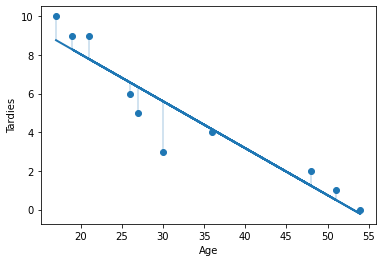

In [17]:
y_hat = beta_0 + beta_1 * student_data.Age #Línea de regresión
plt.scatter(data = student_data, x = "Age", y = "Tardies") # pintar los puntos
plt.plot(student_data.Age, y_hat, lw=2) # pintamos la línea de regresión
plt.vlines(student_data.Age, y_hat, student_data.Tardies , lw = 0.4) # pintamos las líneas que van desde los puntos a la línea
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
#Comments

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [44]:
vehicles = pd.read_csv("./vehicles.csv")

In [45]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

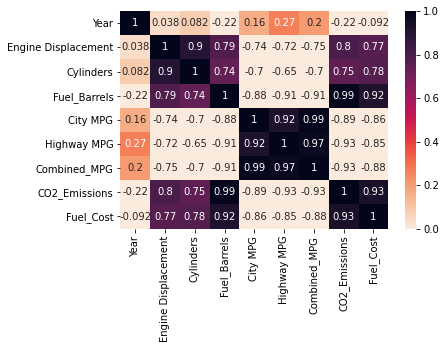

In [69]:
sns.heatmap(vehicles.corr(), vmin=0, vmax=1, annot=True, cmap='rocket_r')

As qe can see in the heatmap of the correlations, the variable more correlated with our dependent variable is Fuel Barrels/Year (99% correlated).

On the other hand, the less correlated variable is Year(just a 22% in a negative direction).

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [46]:
vehicles.rename(columns = {"CO2 Emission Grams/Mile": "CO2_Emissions", "Fuel Barrels/Year": "Fuel_Barrels", "Combined MPG": "Combined_MPG", "Fuel Cost/Year": "Fuel_Cost"}, inplace = True)

In [70]:
results = smf.ols("CO2_Emissions ~ Year * Cylinders * Fuel_Barrels * Combined_MPG * Fuel_Cost", data= vehicles).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.406e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:28:10   Log-Likelihood:            -1.2121e+05
No. Observations:               35952   AIC:                         2.425e+05
Df Residuals:                   35921   BIC:                         2.428e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                          -4.786e+04   3244.390    -14.752      0.000   -5.42e+04   -4.15e+04
Year                                                  24.1647      1.618     14.936      0.000      20.993      27.336
Cylinders                                           7563.0138    589.432     12.831      0.000    6407.709    8718.319
Year:Cylinders                                        -3.8099      0.294    -12.950      0.000      -4.386      -3.233
Fuel_Barrels                                        1862.8536     92.995     20.032      0.000    1680.581    2045.126
Year:Fuel_Barrels                                     -0.9215      0.046    -19.850      0.000      -1.012      -0.830
Cylinders:Fuel_Barrels                              -276.4610     13.899    -19.890      0.000    -303.704    -249.218
Year:Cylinders:Fuel_Barrels                            0.1380      0.007     19.882      0.000       0.124       0.152
Combined_MPG                                         197.6185     29.458      6.708      0.000     139.879     255.358
Year:Combined_MPG                                     -0.0993      0.015     -6.733      0.000      -0.128      -0.070
Cylinders:Combined_MPG                               -39.4447      7.484     -5.270      0.000     -54.114     -24.775
Year:Cylinders:Combined_MPG                            0.0197      0.004      5.269      0.000       0.012       0.027
Fuel_Barrels:Combined_MPG                             42.6884      8.518      5.011      0.000      25.992      59.385
Year:Fuel_Barrels:Combined_MPG                        -0.0220      0.004     -5.182      0.000      -0.030      -0.014
Cylinders:Fuel_Barrels:Combined_MPG                   -6.2065      1.511     -4.109      0.000      -9.167      -3.246
Year:Cylinders:Fuel_Barrels:Combined_MPG               0.0032      0.001      4.283      0.000       0.002       0.005
Fuel_Cost                                             38.0231      2.079     18.290      0.000      33.948      42.098
Year:Fuel_Cost                                        -0.0191      0.001    -18.459      0.000      -0.021      -0.017
Cylinders:Fuel_Cost                                   -6.7490      0.307    -22.017      0.000      -7.350      -6.148
Year:Cylinders:Fuel_Cost                               0.0034      0.000     22.278      0.000       0.003       0.004
Fuel_Barrels:Fuel_Cost                                 0.0995      0.017      5.964      0.000       0.067       0.132
Year:Fuel_Barrels:Fuel_Cost                        -4.914e-05   8.34e-06     -5.892      0.000   -6.55e-05   -3.28e-05
Cylinders:Fuel_Barrels:Fuel_Cost                      -0.0034      0.002     -1.614      0.107      -0.008  

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

From this model, our conclussions are:
    
**All the variables are significative in the model.
The model is similar to the reality because the R-squared is nearly 100.
The intercept has a large value.
The variables with less impact are Year and Fuel Cost/Year.**


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [51]:
party = pd.DataFrame({"X": [1, 3, 4, 6, 8, 9, 11, 14], "Y": [1, 2, 4, 4, 5, 7, 8, 13]}) 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

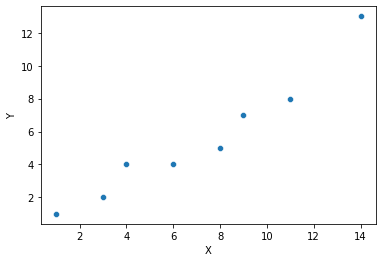

In [53]:
sns.scatterplot(data=party, x="X", y="Y")

In [54]:
lr.fit(

    X = party[["X"]],
    y = party.Y
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [55]:
beta_1

0.8484848484848485

In [56]:
beta_0

-0.43939393939393945

<function matplotlib.pyplot.show(close=None, block=None)>

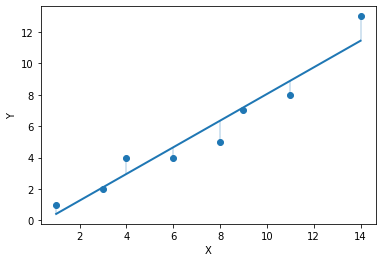

In [57]:
y_hat = beta_0 + beta_1 * party.X #Línea de regresión
plt.scatter(data = party, x = "X", y = "Y") # pintar los puntos
plt.plot(party.X, y_hat, lw=2) # pintamos la línea de regresión
plt.vlines(party.X, y_hat, party.Y , lw = 0.4) # pintamos las líneas que van desde los puntos a la línea
plt.xlabel("X")
plt.ylabel("Y")
plt.show

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
#Comments

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [62]:
party.drop(index = 7, inplace = True)

In [64]:
lr.fit(

    X = party[["X"]],
    y = party.Y
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [66]:
beta_1

0.6842105263157896

In [67]:
beta_0

0.32330827067669077

<function matplotlib.pyplot.show(close=None, block=None)>

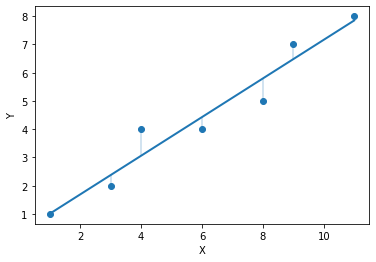

In [65]:
y_hat = beta_0 + beta_1 * party.X #Línea de regresión
plt.scatter(data = party, x = "X", y = "Y") # pintar los puntos
plt.plot(party.X, y_hat, lw=2) # pintamos la línea de regresión
plt.vlines(party.X, y_hat, party.Y , lw = 0.4) # pintamos las líneas que van desde los puntos a la línea
plt.xlabel("X")
plt.ylabel("Y")
plt.show

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 